In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Dictionary Attacks

In [2]:
import pikepdf
import time
from colorama import Fore

In [3]:
# Encrypting our sample pdf with a password
pdf = pikepdf.Pdf.open('sample.pdf') 

# protected pdf
protected = 'protected.pdf'

# The password dictionary we will be working with
# unzip rockyou zip file and open it here
'''Back in 2009, a company named RockYou was hacked. This wouldn't have been too much of a problem if they
 hadn't stored all of their passwords unencrypted, in plain text for an attacker to see. 
 They downloaded a list of all the passwords and made it publically available. 
 This file is commonly used for brute force or dictionary attacks on web applications.'''

passwordDict = open('C:/Users/jlutz/cmda4984/rockyou.txt')

In [4]:
# Adding password protection to the pdf
# you can change the R from 4 to 6 for 256 aes encryption
passKey = 'password123'
pdf.save(protected, encryption=pikepdf.Encryption(owner = passKey,user=passKey,R=4))

pdf.close()


In [5]:
# Iterating through our password dictionary to crack the password

# Timing how long it takes
t0 = time.time()
for guess in passwordDict:
    try:
        pikepdf.open(protected,password = guess.strip())
        t1 = time.time()

        print(Fore.GREEN + 'Password Found: ' + guess )
        print('It took: ' + str(t1 - t0) + 'seconds')
        correct = guess
        break

    except:
        print(Fore.RED + 'Trying Passwords: '+ guess.strip())
        continue

Trying Passwords: 123456
Trying Passwords: 12345
Trying Passwords: 123456789
Trying Passwords: password
Trying Passwords: iloveyou
Trying Passwords: princess
Trying Passwords: 1234567
Trying Passwords: rockyou
Trying Passwords: 12345678
Trying Passwords: abc123
Trying Passwords: nicole
Trying Passwords: daniel
Trying Passwords: babygirl
Trying Passwords: monkey
Trying Passwords: lovely
Trying Passwords: jessica
Trying Passwords: 654321
Trying Passwords: michael
Trying Passwords: ashley
Trying Passwords: qwerty
Trying Passwords: 111111
Trying Passwords: iloveu
Trying Passwords: 000000
Trying Passwords: michelle
Trying Passwords: tigger
Trying Passwords: sunshine
Trying Passwords: chocolate
Trying Passwords: password1
Trying Passwords: soccer
Trying Passwords: anthony
Trying Passwords: friends
Trying Passwords: butterfly
Trying Passwords: purple
Trying Passwords: angel
Trying Passwords: jordan
Trying Passwords: liverpool
Trying Passwords: justin
Trying Passwords: loveme
Trying Passwords:

In [6]:
# Opening the protected pdf with the now cracked password
cracked = pikepdf.open(protected,password = guess.strip())

# Getting the first page of the cracked pdf
page1 = cracked.pages[0]

In [7]:
# finding the image key of the image on the first page of the pdf
imageKey = list(page1.images.keys())
imageKey

['/Image11']

In [8]:
# The raw image of the pdf
rawimage = page1.images[imageKey[0]]

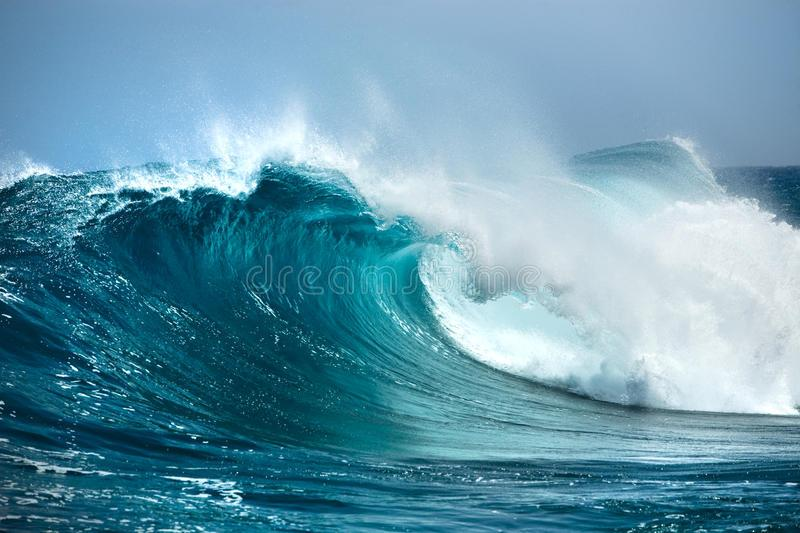

In [9]:
# Extracting the image from the protected pdf
pdfimage = pikepdf.PdfImage(rawimage)
pdfimage.extract_to(fileprefix='image')
pdfimage